# Workgroup 1

## Part 1

Focus on the subset of college-educated workers (scl, clg variables). The analysis should be analogous to what we’ve presented – explaining "partialling out", generating point estimates and standard errors.

## Data analysis

In [8]:
import pandas as pd
import numpy as np
import pyreadr
import math

In [9]:
rdata_read = pyreadr.read_r("C:/Users/Hp/OneDrive/Documentos/GitHub/ECO224/Labs/data/wage2015_subsample_inference.Rdata")

# Extracting the data frame from rdata_read
data = rdata_read[ 'data' ]

data.shape

(5150, 20)

In [10]:
data['clg'].value_counts()

0.0    3514
1.0    1636
Name: clg, dtype: int64

In [11]:
data['clg'].value_counts()

0.0    3514
1.0    1636
Name: clg, dtype: int64

We run the next lines to focus on the subset of college-educated workers

In [12]:
scl_data=data[data['scl']==1]
clg_data=data[data['clg']==1]
scl_data

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
84,12.019231,2.486508,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.5,0.3025,0.166375,0.091506,3600,11,8270,18
89,13.461538,2.599837,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.5,4.2025,8.615125,17.661006,3645,11,8190,18
119,8.653846,2.158004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.1225,0.042875,0.015006,7410,20,570,3
135,10.683761,2.368725,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.5,0.4225,0.274625,0.178506,4300,15,8590,19
144,11.538462,2.445686,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8.5,0.7225,0.614125,0.522006,3600,11,8190,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32528,12.019231,2.486508,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.1600,0.064000,0.025600,9620,22,6170,10
32539,38.461538,3.649659,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7.5,0.5625,0.421875,0.316406,220,1,770,4
32551,27.884615,3.328075,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28.5,8.1225,23.149125,65.975006,8140,21,770,4


In [13]:
scl_data.shape

(1432, 20)

In [14]:
clg_data

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
30,11.730769,2.462215,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.01,0.001,0.0001,1650,5,7460,14
71,19.230769,2.956512,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.16,0.064,0.0256,3255,10,8190,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,21.153846,3.051822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,7.84,21.952,61.4656,40,1,9170,21
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,0.25,0.125,0.0625,3255,10,8190,18
32606,24.038462,3.179655,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,2.89,4.913,8.3521,2550,8,9480,22


In [15]:
clg_data.shape

(1636, 20)

In [16]:
new_data=scl_data
new_data=new_data.append(clg_data)
new_data

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
84,12.019231,2.486508,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.5,0.3025,0.166375,0.091506,3600,11,8270,18
89,13.461538,2.599837,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,20.5,4.2025,8.615125,17.661006,3645,11,8190,18
119,8.653846,2.158004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.1225,0.042875,0.015006,7410,20,570,3
135,10.683761,2.368725,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.5,0.4225,0.274625,0.178506,4300,15,8590,19
144,11.538462,2.445686,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,8.5,0.7225,0.614125,0.522006,3600,11,8190,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32593,21.153846,3.051822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,7.8400,21.952000,61.465600,40,1,9170,21
32596,45.546559,3.818735,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,0.2500,0.125000,0.062500,3255,10,8190,18
32606,24.038462,3.179655,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,17.0,2.8900,4.913000,8.352100,2550,8,9480,22


In [17]:
new_data.shape

(3068, 20)

We compare in the next table the sample means given gender

In [18]:
new_data_all = new_data[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

new_data_female = new_data[new_data[ 'sex' ] == 1 ]
female = new_data_female[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"] ]

new_data_male = new_data[ new_data[ 'sex' ] == 0 ]
male = new_data_male[ [ "lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1" ] ]


table = np.zeros( (12, 3) )
table[:, 0] = new_data_all.mean().values
table[:, 1] = male.mean().values
table[:, 2] = female.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Men', 'Women'])
table_pandas.index = ["Log Wage","Sex","Less then High School","High School Graduate","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience"]
table_html = table_pandas.to_html()

table_pandas

,All,Men,Women
Log Wage,3.000022,3.038412,2.956904
Sex,0.470991,0.000000,1.000000
Less then High School,0.000000,0.000000,0.000000
High School Graduate,0.000000,0.000000,0.000000
Some College,0.466754,0.481824,0.449827
Gollage Graduate,0.533246,0.518176,0.550173
Advanced Degree,0.000000,0.000000,0.000000
Northeast,0.226532,0.219347,0.234602
Midwest,0.265971,0.261245,0.271280
South,0.285854,0.290819,0.280277


the table shows that the difference in average *logwage* between college-educated men and women is equal to $0,0815$

In [19]:
female['lwage'].mean() - male['lwage'].mean()

-0.08150855508735955

Thus, the unconditional gender wage gap is about $8,15$\% for the group of never married workers (women get paid less on average in our sample). We also observe that never married working women are relatively more educated than working men and have lower working experience.

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running an ols regression in Python.

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = new_data )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

# print unconditional effect of gender and the corresponding standard error
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}' )

The estimated gender coefficient is -0.08150855508736082 and the corresponding robust standard error is 0.01957964776777238


Next, we run an ols regression with controls.

## Ols regression with controls

In [22]:
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'

# The smf api replicates R script when it transform data
control_model = smf.ols( formula = flex, data = new_data )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']

print(control_model.fit().summary2().tables[1])
print( f"Coefficient for OLS with controls {control_est}" )

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

               Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
Intercept   2.073357  0.214419  9.669647  8.761691e-22  1.652924  2.493790
occ2[T.10]  0.091982  0.243220  0.378184  7.053225e-01 -0.384925  0.568888
occ2[T.11] -0.499418  0.436858 -1.143202  2.530511e-01 -1.356010  0.357175
occ2[T.12]  0.190101  0.341142  0.557249  5.774012e-01 -0.478810  0.859012
occ2[T.13] -0.194529  0.271881 -0.715492  4.743637e-01 -0.727633  0.338575
...              ...       ...       ...           ...       ...       ...
exp4:scl    0.021375  0.022071  0.968465  3.328946e-01 -0.021902  0.064653
exp4:clg    0.007909  0.021929  0.360650  7.183881e-01 -0.035090  0.050908
exp4:mw     0.014287  0.025814  0.553477  5.799802e-01 -0.036328  0.064902
exp4:so    -0.003759  0.022547 -0.166725  8.675981e-01 -0.047968  0.040450
exp4:we     0.028286  0.023812  1.187890  2.349761e-01 -0.018405  0.074978

[246 rows x 6 columns]
Coefficient for OLS with controls -0.05306234035774983


The estimated regression coefficient $\beta_1\approx-0.053$ measures how our linear prediction of wage changes if we set the gender variable $D$ from 0 to 1, holding the controls $W$ fixed.
We can call this the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make. Overall, we see that the unconditional wage gap of size $8$\% for women decreases to about $5$\% after controlling for worker characteristics.  


Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

## Partialling-Out using ols

In [23]:
# models
# model for Y
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
# model for D
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = new_data ).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = new_data ).fit().resid

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )
# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']

print("Coefficient for D via partialling-out", partial_est)

# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

# confidence interval
partial_fit.conf_int( alpha=0.05 ).iloc[1, :]

Coefficient for D via partialling-out -0.05306234035775352


0   -0.089571
1   -0.016554
Name: t_D, dtype: float64

As we can see, the coefficient for D via partialling-out is -0.053, which is the same estimated coefficient from the ols regression with controls.

## Part 2

Graph replication

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
reg_scl= smf.ols( formula = 'lwage ~ exp1'  , data = new_data ).fit()
reg_scl

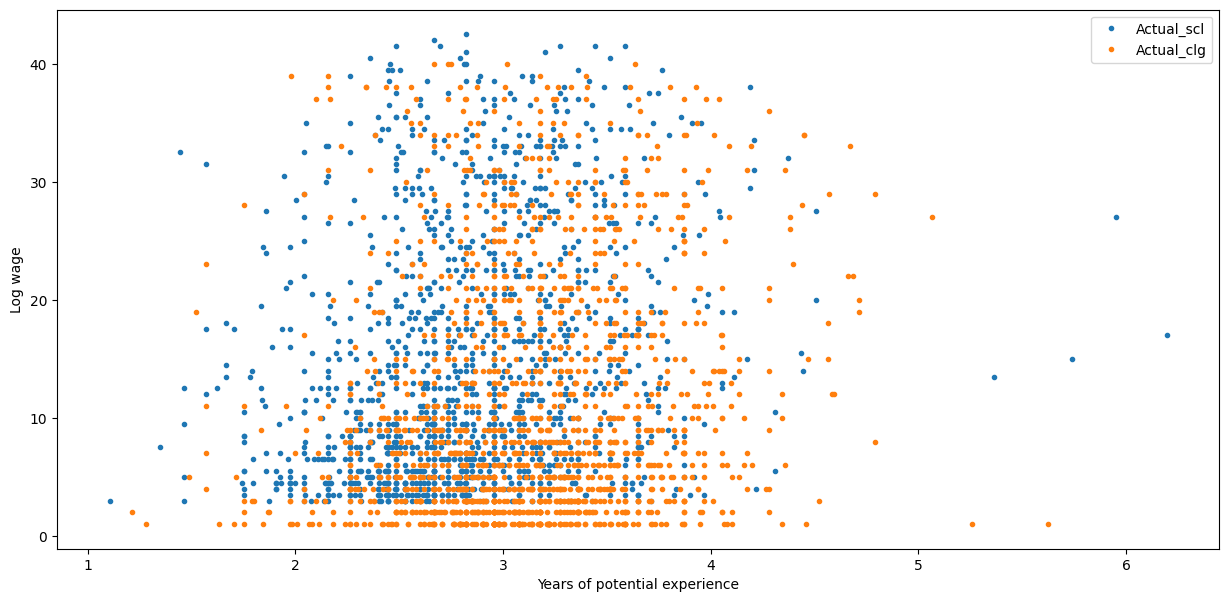

In [44]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111, xlabel='Years of potential experience', ylabel='Log wage')
ax.plot(scl_data['lwage'], scl_data['exp1'], '.', label='Actual_scl')
ax.plot(clg_data['lwage'], clg_data['exp1'], '.', label='Actual_clg')
plt.legend(loc=0);
fig

In [40]:
sns.regplot(x=new_data[new_data['clg']==1].exp2,y=new_data[new_data['clg']==1].lwage,scatter=True,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None)
sns.regplot(x=new_data[new_data['scl']==1].exp2,y=new_data[new_data['scl']==1].lwage,scatter=True,order=2,x_jitter=.001,x_estimator=np.mean,fit_reg=True,ci=None)
sns.regplot

<function seaborn.regression.regplot(*, x=None, y=None, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)>

# Part 3

## Frisch-Waugh-Lovell

In the linear least squares regression of vector y on two sets of variables, $X_1$ and $X_2$, the subvector $b_2$ is the set of coefficients obtained when the residuals from a regression of y on $X_1$ alone are regressed on the set of residuals obtained when each column of $X_2$ is regressed on $X_1$.

Suppose that the regression involves two sets of variables, $X_1$ and $X_2$. Thus,

$$y = X\beta + \varepsilon = X_1\beta_1 + X_2\beta_2 + \varepsilon $$
We want to know $\beta_2$. Nevertheless, the two sets of variables $X_1$ and $X_2$ are not orthogonal, then Frisch-Waugh-Lovell theorem is needed. What is the algebraic solution for $\beta_2$? A solution can be obtained by using the partitioned inverse matrix.

$$
\left(\begin{array}{cc} 
X_1'X_1 &amp; X_1'X_2\\
X_2'X_1 &amp; X_2'X_2
\end{array}\right)
\left(\begin{array}{cc} 
b_1 \\ 
b_2 
\end{array}\right)
=
\left(\begin{array}{cc} 
X_1'y \\ 
X_2'y
\end{array}\right)
$$
First, we solve $\beta_1$, where $\beta_1$ is the set of coefficientes of $y$ on $X_1$.$$ X_1'X_1b_1 + X_1'X_2b_2=X_1'y $$$$b_1 = (X_1'X_1)^-1X'_1y - (X'_1X_1)^-1X'_1X_2b_2 $$

Then, use the second equation of the partitioned inverse matrix.$$ X_2'X_1b_1 + X_2'X_2b_2=X_2'y $$

Now, insert the result for $\beta_1$. This produces:$$X_2'X_1(X_1'X_1)^-1X'_1y-X'_2X_1(X'_1X_1)^-1X'_1X_2b_2+X'_2X_2b_2=X'_2y$$$$X_2'(I-X_1(X_1'X_1)^-1y=X_2'(I-X_1(X_1'X_1)^-1)X_2b_2$$$$b_2 =[X_2'(I-X_1(X_1'X_1)^-1)X_2]^-1[X_2'(I-X_1(X_1'X_1)^-1)y]$$

The $M_1$ matrix is the residual maker:$$M_1=I-X_1(X_1'X_1)^-1$$

Insert $M_1$ in the equiation below:$$b_2 =[X_2'M_1X_2]^-1[X_2'M_1y]$$

Thus, $M_1X_2$ is a matrix of residuals in the regression of $X_2$ on $X_1$, and $M_1y$ is a matrix of residuals in the regression of $y$ in $X_1$. By exploiting the fact that $M_1$ is symmetric and idempotent, we can rewrite the equation as:

$X_2*=M_1X_2$ and $y*=M_1y$$$b_2=(X'_2*X_2*)^-1X'_2*y*$$​This process is commonly called partialing out or netting out the effect of $X_1$.

On the other hand, If we follow the algorithm seen in class we can reach the same result. In essence, the demonstration above follows the same algorithm, however, the following demonstration may be easier to understand.

Suppose that the regression involves two sets of variables, $X_1$ and $X_2$. Thus,

$$y = X\beta + \varepsilon = X_1\beta_1 + X_2\beta_2 + \varepsilon $$
To find $\beta_2$ follow the next algorithm:

Regress $y$ on $X_2$, obtain residual $u_1$
Regress $X_1$ on $X_2$, obtain residual $u_2$
Regress $u_1$ on $u_2$, obtain OLS estimates $b_1$